## Crop Yield Prediction

This dataset contains agricultural data for 1,000,000 samples aimed at predicting crop yield (in tons per hectare) based on various factors. The dataset can be used for regression tasks in machine learning, especially for predicting crop productivity.

- Region: The geographical region where the crop is grown (North, East, South, West).
- Soil_Type: The type of soil in which the crop is planted (Clay, Sandy, Loam, Silt, Peaty, Chalky).
- Crop: The type of crop grown (Wheat, Rice, Maize, Barley, Soybean, Cotton).
- Rainfall_mm: The amount of rainfall received in millimeters during the crop growth period.
- Temperature_Celsius: The average temperature during the crop growth period, measured in degrees Celsius.
- Fertilizer_Used: Indicates whether fertilizer was applied (True = Yes, False = No).
- Irrigation_Used: Indicates whether irrigation was used during the crop growth period (True = Yes, False = No).
- Weather_Condition: The predominant weather condition during the growing season (Sunny, Rainy, Cloudy).
- Days_to_Harvest: The number of days taken for the crop to be harvested after planting.
- Yield_tons_per_hectare: The total crop yield produced, measured in tons per hectare.

*Dataset available on [Kaggle](https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield)*

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import joblib, time, sys
import cloudpickle
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
def load_crop_data():
    # if on colab
    # csv_path = "/content/drive/MyDrive/ml_ai/crop_yield_prediction/crop_yield.csv"
    # if on remote machine
    csv_path = "crop_yield.csv"
    return pd.read_csv(csv_path)

In [3]:
crop = load_crop_data()
crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
#makes each column name lowercase and replaces spaces with underscores
crop.columns = crop.columns.str.lower().str.replace(' ','_')

In [5]:
#makes every element in the dataframe lowercase and replaces spaces with underscores
columns = list(crop.dtypes[crop.dtypes == 'object'].index)
for col in columns:
    crop[col] = crop[col].str.lower().str.replace(' ','_')

In [29]:
crop.head()

,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_tons_per_hectare
0,west,sandy,cotton,897.077239,27.676966,False,True,cloudy,122,6.555816
1,south,clay,rice,992.673282,18.026142,True,True,rainy,140,8.527341
2,north,loam,barley,147.998025,29.794042,False,False,sunny,106,1.127443
3,north,sandy,soybean,986.866331,16.644190,False,True,rainy,146,6.517573
4,south,silt,wheat,730.379174,31.620687,True,True,cloudy,110,7.248251


In [ ]:
crop.head(10).T

,0,1,2,3,4,5,6,7,8,9
region,west,south,north,north,south,south,west,south,north,west
soil_type,sandy,clay,loam,sandy,silt,silt,clay,sandy,silt,sandy
crop,cotton,rice,barley,soybean,wheat,soybean,wheat,rice,wheat,wheat
rainfall_mm,897.077239,992.673282,147.998025,986.866331,730.379174,797.471182,357.902357,441.131154,181.587861,395.048968
temperature_celsius,27.676966,18.026142,29.794042,16.64419,31.620687,37.704974,31.593431,30.887107,26.752729,17.646199
fertilizer_used,False,True,False,False,True,False,False,True,True,False
irrigation_used,True,True,False,True,True,True,False,True,False,True
weather_condition,cloudy,rainy,sunny,rainy,cloudy,rainy,rainy,sunny,sunny,rainy
days_to_harvest,122,140,106,146,110,74,90,61,127,140
yield_tons_per_hectare,6.555816,8.527341,1.127443,6.517573,7.248251,5.898416,2.652392,5.829542,2.943716,3.707293


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   region                  1000000 non-null  object 
 1   soil_type               1000000 non-null  object 
 2   crop                    1000000 non-null  object 
 3   rainfall_mm             1000000 non-null  float64
 4   temperature_celsius     1000000 non-null  float64
 5   fertilizer_used         1000000 non-null  bool   
 6   irrigation_used         1000000 non-null  bool   
 7   weather_condition       1000000 non-null  object 
 8   days_to_harvest         1000000 non-null  int64  
 9   yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


There are 10 columns in total, three numerical and six categorical features. `Yield_tons_per_hectare ` is the label and will be separated from the features.

In [ ]:
crop.describe()

,rainfall_mm,temperature_celsius,days_to_harvest,yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


We can see there is **negative** `yield_tons_per_hectare` which is not physically possible because it represents total crop yield produced which is a non-negative quantity.
So we may eliminate corresponding rows to prevent our model from learning to reproduce it.

In [ ]:
len(crop[crop['yield_tons_per_hectare'] < 0])

231

In [6]:
crop = crop[crop['yield_tons_per_hectare'] >= 0]

Remove rows that contain negative `yield_tons_per_hectare` before train_test_split

In [ ]:
len(crop[crop['yield_tons_per_hectare'] < 0])

0

We also have `Boolean` type in the dataset, we need to convert to in

In [7]:
crop['fertilizer_used'] = (crop['fertilizer_used'] == True).astype(int)
crop['irrigation_used'] = (crop['irrigation_used'] == True).astype(int)

In [ ]:
crop.head()

,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_tons_per_hectare
0,west,sandy,cotton,897.077239,27.676966,0,1,cloudy,122,6.555816
1,south,clay,rice,992.673282,18.026142,1,1,rainy,140,8.527341
2,north,loam,barley,147.998025,29.794042,0,0,sunny,106,1.127443
3,north,sandy,soybean,986.866331,16.644190,0,1,rainy,146,6.517573
4,south,silt,wheat,730.379174,31.620687,1,1,cloudy,110,7.248251


In [ ]:
crop.isnull().sum()

region                    0
soil_type                 0
crop                      0
rainfall_mm               0
temperature_celsius       0
fertilizer_used           0
irrigation_used           0
weather_condition         0
days_to_harvest           0
yield_tons_per_hectare    0
dtype: int64

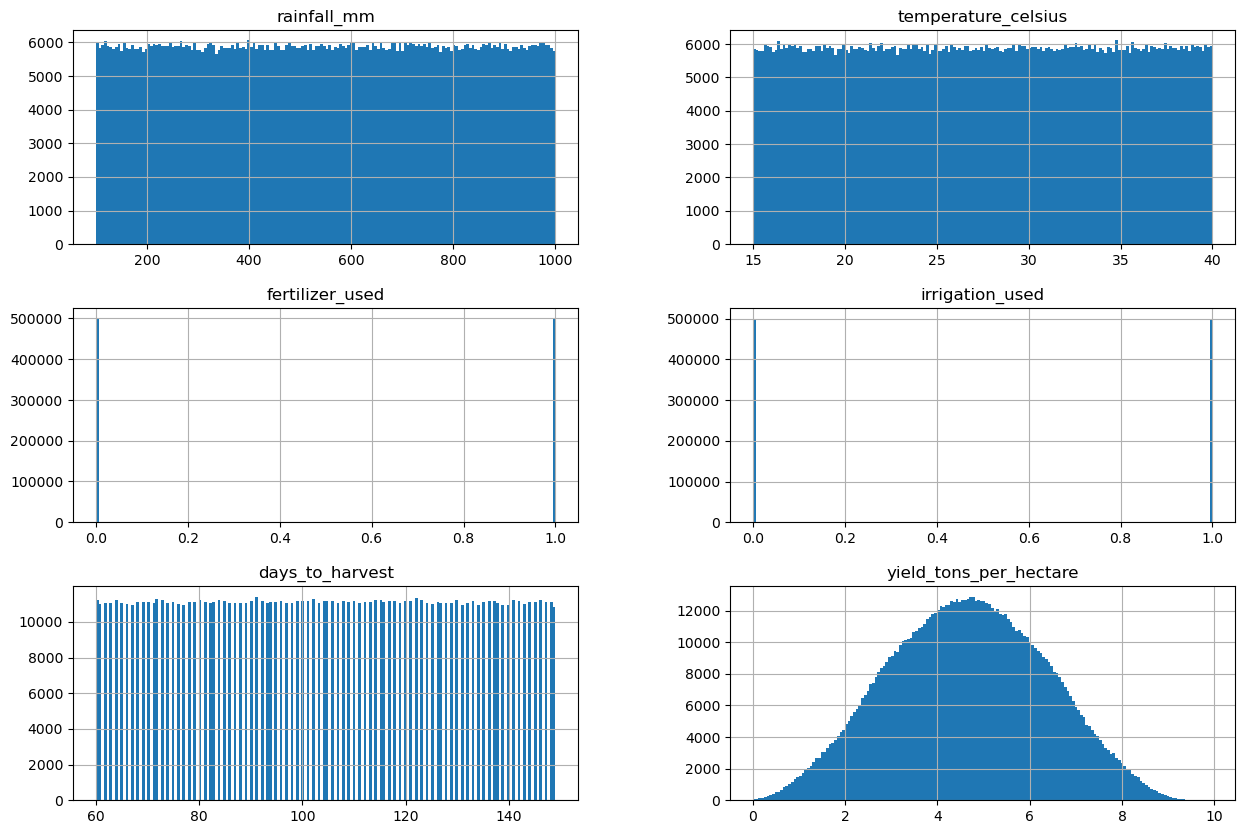

In [ ]:
crop.hist(bins = 170, figsize = (15,10))
plt.show()

Here’s an explanation of each histogram:

1. **Rainfall (rainfall_mm - Top Left)**  
   - The histogram shows a uniform distribution, meaning rainfall values are evenly spread across the dataset.  
   - This suggests there is no strong bias toward any specific rainfall amount, indicating a well-distributed dataset.  
   - If analyzing crop yield, this suggests that crops are exposed to a variety of rainfall conditions, helping in understanding how different levels affect growth.

2. **Temperature (temperature_celsius - Top Right)**  
   - Similar to rainfall, the temperature data follows a uniform distribution.  
   - This means temperature values range evenly from 15°C to 40°C, suggesting a wide variety of climate conditions.  
   - This can be useful in understanding how yield responds to different temperature variations and determining the optimal range for farming.

3. **Days to Harvest (days_to_harvest - Bottom Left)**  
   - This histogram appears to be nearly uniform but with slight variations.  
   - The dataset contains a broad range of harvest times from around 60 to 150 days, meaning different crops or varieties are considered.  
   - Understanding how harvest time influences yield is essential for predicting optimal growing conditions.

4. **Yield per Hectare (yield_tons_per_hectare - Bottom Right)**  
   - The yield follows a **normal distribution** (bell-shaped curve), meaning most values are concentrated around a central point (mean yield), with fewer values on the extremes.  
   - This suggests that under typical conditions, yield tends to cluster around an average, with fewer instances of extremely low or high yields.  
   - This insight helps in identifying expected yield levels and understanding factors that lead to deviations from the mean.

### Key Takeaways:
- Rainfall and temperature exhibit **uniform distributions**, meaning a diverse range of conditions is considered.
- Days to harvest has a **near-uniform** spread, indicating varying crop lifespans.
- Yield follows a **normal distribution**, suggesting most yields are predictable around a mean value.
- These insights can help optimize farming strategies by identifying environmental factors that most impact yield.

#### Train_Test_Split

In [8]:
crop_train_full, crop_test = sklearn.model_selection.train_test_split(crop, test_size = 0.2, random_state = 42)

In [9]:
crop_train, crop_val = sklearn.model_selection.train_test_split(crop_train_full, test_size = 0.3, random_state = 42)

In [10]:
y_train_full = crop_train_full.yield_tons_per_hectare.values
y_train = crop_train.yield_tons_per_hectare.values
y_val = crop_val.yield_tons_per_hectare.values
y_test = crop_test.yield_tons_per_hectare.values

In [11]:
del crop_train['yield_tons_per_hectare']
del crop_val['yield_tons_per_hectare']
del crop_test['yield_tons_per_hectare']

In [35]:
print(crop_train.shape)
print(crop_val.shape)
print(crop_test.shape)

(559870, 9)
(239945, 9)
(199954, 9)


In [36]:
print(y_train.shape)
print(y_val.shape)

(559870,)
(239945,)


In [12]:
numerical_columns = ['rainfall_mm', 'temperature_celsius', 'days_to_harvest', 'fertilizer_used', 'irrigation_used']
categorical_columns = ['region', 'soil_type', 'crop', 'weather_condition']

### **Categorical Features:**
1. **Region (North, East, South, West)**  
   - Different regions have varying climatic conditions, soil quality, and agricultural practices.  
   - Some regions may have more favorable conditions for specific crops, leading to higher yields.

2. **Soil_Type (Clay, Sandy, Loam, Silt, Peaty, Chalky)**  
   - Soil type affects water retention, nutrient availability, and root penetration.  
   - **Loam soil** is generally the most fertile, while **sandy soil** drains too quickly, which may reduce yield unless managed properly.

3. **Crop (Wheat, Rice, Maize, Barley, Soybean, Cotton)**  
   - Different crops have different growth requirements (e.g., **rice needs more water**, while **cotton is more drought-resistant**).  
   - Crop type directly affects yield expectations, as some naturally produce higher or lower yields.

4. **Weather_Condition (Sunny, Rainy, Cloudy)**  
   - **Sunny weather** can promote growth but might cause heat stress if excessive.  
   - **Rainy weather** is beneficial but can lead to waterlogging, which harms certain crops.  
   - **Cloudy weather** reduces sunlight exposure, possibly slowing photosynthesis and affecting yield.

### **Numerical Features:**
5. **Rainfall_mm**  
   - Adequate rainfall ensures proper water supply, leading to healthy plant growth.  
   - **Too much rainfall** can cause waterlogging, root rot, and fungal diseases, reducing yield.  
   - **Too little rainfall** can lead to drought stress, affecting crop development.

6. **Temperature_Celsius**  
   - Each crop has an **optimal temperature range** for growth.  
   - **Extreme temperatures** (too hot or too cold) can reduce yield by affecting germination, growth rate, and flowering.  
   - **Moderate temperatures** generally favor crop development.

7. **Days_to_Harvest**  
   - A longer growing period may allow more biomass accumulation, leading to **higher yields**.  
   - However, some crops may degrade in quality if they take too long to mature.

### **Boolean Features (True/False):**
8. **Fertilizer_Used**  
   - Fertilizers **increase nutrient availability**, leading to better crop growth and higher yields.  
   - However, **excessive fertilizer use** can cause nutrient imbalances, harming yield and soil health.

9. **Irrigation_Used**  
   - Irrigation **ensures water availability**, especially in dry conditions, leading to **higher yields**.  
   - In regions with sufficient rainfall, irrigation might have **less impact** on yield.  
   - **Over-irrigation** can lead to soil erosion or nutrient leaching, negatively impacting yield.

**The Boolean Features have been converted to Numerical Features - 0/1 (False/True)**

### **Overall Relationship with Yield:**  
- **Positive Impact:** Moderate **rainfall, temperature, fertilizer, irrigation, loam soil, and proper harvesting time** will **increase yield**.  
- **Negative Impact:** **Extreme temperatures, excessive/insufficient rainfall, poor soil types, and improper water/fertilizer management** will **reduce yield**.  

In [ ]:
crop_train_full_copy = crop_train_full.copy()

In [ ]:
crop_train_full_copy[categorical_columns].nunique()

region               4
soil_type            6
crop                 6
weather_condition    3
dtype: int64

In [ ]:
for categorical in categorical_columns:
    print(crop_train_full_copy[categorical].value_counts(),'\n')

region
west     200378
north    200057
south    200032
east     199348
Name: count, dtype: int64 

soil_type
sandy     133701
loam      133404
chalky    133383
peaty     133182
silt      133099
clay      133046
Name: count, dtype: int64 

crop
cotton     133410
wheat      133355
maize      133348
rice       133263
barley     133252
soybean    133187
Name: count, dtype: int64 

weather_condition
sunny     267108
rainy     266686
cloudy    266021
Name: count, dtype: int64 



In [ ]:
# label = ['1', '2', '3'] #1:low, 2:medium; 3:high

bins = [-np.inf, 3, 6, np.inf]
crop_train_full_copy['yield_label'] = np.digitize(crop_train_full_copy['yield_tons_per_hectare'], bins, right = False)

In [ ]:
crop_train_full_copy.head().T

,816419,180578,766106,207834,411634
region,west,north,north,north,north
soil_type,clay,sandy,peaty,chalky,loam
crop,soybean,barley,cotton,wheat,soybean
rainfall_mm,835.288831,867.649855,269.615635,923.607497,354.781067
temperature_celsius,39.936159,35.125782,19.801171,21.427055,18.384813
fertilizer_used,1,1,1,0,1
irrigation_used,0,0,1,0,1
weather_condition,cloudy,sunny,cloudy,rainy,cloudy
days_to_harvest,77,131,67,128,96
yield_tons_per_hectare,6.411219,7.09672,4.404192,5.364438,4.76866


In [ ]:
crop_train_full_copy['rainfall_temp_interaction'] = crop_train_full_copy['rainfall_mm'] * crop_train_full_copy['temperature_celsius']
crop_train_full_copy['fertilizer_irrigation_interaction'] = ((crop_train_full_copy['fertilizer_used'] == 1) & (crop_train_full_copy['irrigation_used'] == 1)).astype(int)

In [ ]:
def calculate_mutual_info(data):
    return sklearn.metrics.mutual_info_score(data, crop_train_full_copy.yield_label)

crop_train_full_copy_mi = crop_train_full_copy[categorical_columns].apply(calculate_mutual_info)
crop_train_full_copy_mi = crop_train_full_copy_mi.sort_values(ascending=False).to_frame(name = 'mutual_information')

crop_train_full_copy_mi

,mutual_information
crop,7.704473e-06
soil_type,3.450390e-06
region,1.326481e-06
weather_condition,8.385662e-07


In [ ]:
columns = ['rainfall_mm', 'temperature_celsius', 'days_to_harvest', 'rainfall_temp_interaction', 'fertilizer_used', 'irrigation_used', 'fertilizer_irrigation_interaction']
crop_train_full_copy_corr = crop_train_full_copy[columns].corrwith(crop_train_full_copy.yield_tons_per_hectare).to_frame('correlation')
crop_train_full_copy_corr.sort_values('correlation', ascending=False)

,correlation
rainfall_mm,0.764229
rainfall_temp_interaction,0.691116
fertilizer_irrigation_interaction,0.459654
fertilizer_used,0.442345
irrigation_used,0.353458
temperature_celsius,0.084577
days_to_harvest,-0.002805


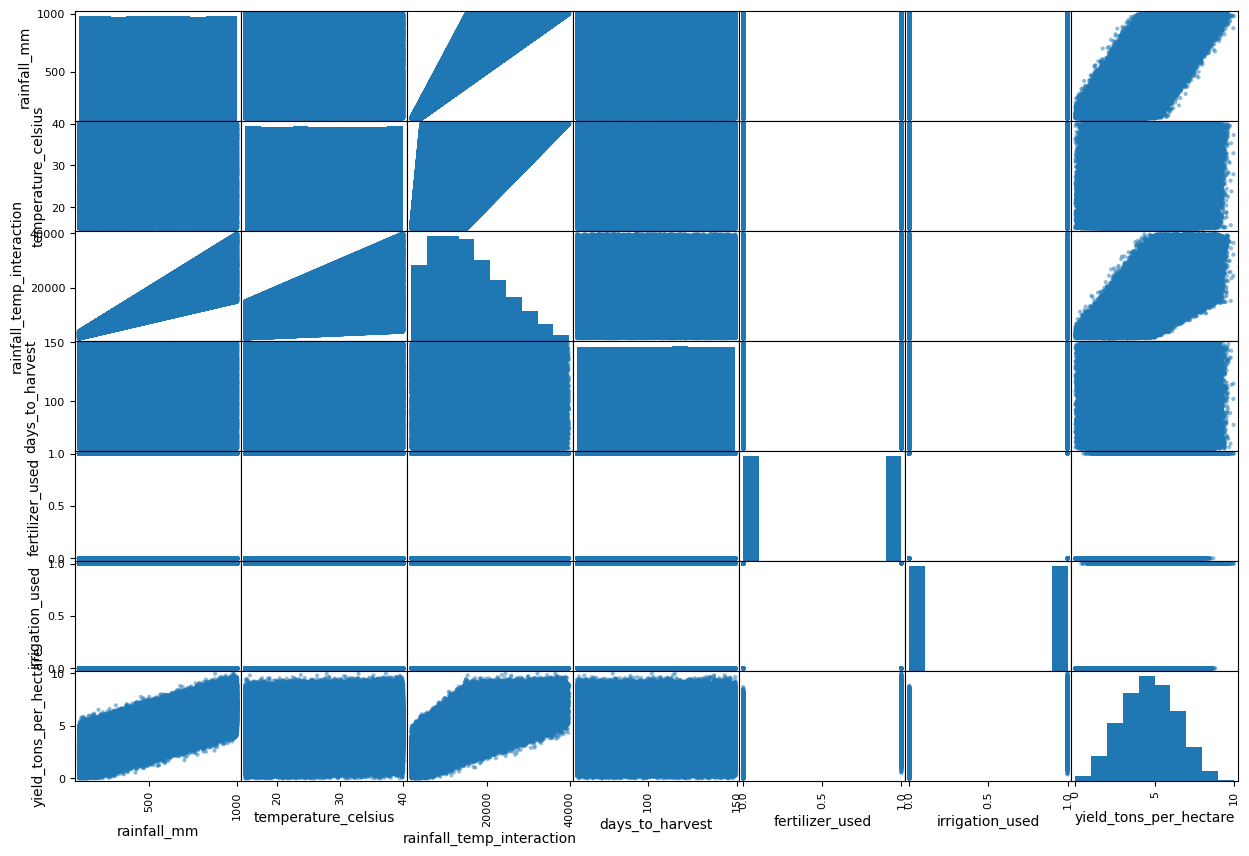

In [ ]:
colmns = ['rainfall_mm', 'temperature_celsius', 'rainfall_temp_interaction', 'days_to_harvest', 'fertilizer_used', 'irrigation_used', 'yield_tons_per_hectare']
pd.plotting.scatter_matrix(crop_train_full_copy[colmns], figsize=(15,10))
plt.show()

In [13]:
#column selector
class ColumnSelector(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        if isinstance(X, np.ndarray):
            # If input is a 1D NumPy array
            return X
        return X[self.columns].values

In [14]:
#adding features
# Assuming rainfall, temperature, fertilizer_used and irrigation_used are at indices 0,1,3,4
rainfall_ix, temperature_ix, fertilizer_used_ix, irrigation_used_ix = 0, 1, 3, 4

class CombinedFeaturesAdder(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, add_rain_temp_interaction = True, add_fertilizer_irrigation_interaction = True):
        self.add_rain_temp_interaction = add_rain_temp_interaction
        self.add_fertilizer_irrigation_interaction = add_fertilizer_irrigation_interaction
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # rain and temperature interaction
        if self.add_rain_temp_interaction:
            rain_temp_interaction = X[:, rainfall_ix] * X[:, temperature_ix]
            return np.c_[X, rain_temp_interaction]
        # fertilizer and irrigation interaction
        if self.add_fertilizer_irrigation_interaction:
            # Create a new feature that is 1 only when BOTH fertilizer and irrigation are used
            fertilizer_irrigation_interaction = (X[:, fertilizer_used_ix] == 1) & (X[:, irrigation_used_ix] == 1)
            X = np.c_[X, fertilizer_irrigation_interaction.astype(int)]
        else:
            return X

In [15]:
class CategoricalLabelBinarizer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self):
        self.encoders = {} # Initialize an empty dictionary for storing LabelBinarizers

    def fit(self, X, y = None):
        self.encoders = {} # Resetting self.encoders
        X = np.array(X, dtype=object) # Ensure it's a NumPy array

        for i in range(X.shape[1]):
            if isinstance(X[0, i], str):
                label_binarizer = LabelBinarizer() #sklearn.preprocessing.LabelBinarizer()
                label_binarizer.fit(X[:, i])
                self.encoders[i] = label_binarizer
            else:
                raise ValueError(f"Column \"{i}\" is not categorical (string type). Only categorical features are allowed.")
        return self

    def transform(self, X, y = None):
        X = np.array(X, dtype=object) # Ensure it's a NumPy array
        binarized_columns = []

        for i in range(X.shape[1]):
            if i in self.encoders:
                binarized_columns.append(self.encoders[i].transform(X[:, i]))
        return np.hstack(binarized_columns)

In [16]:
'''
feature engineering
onehot encode the categorical data
feature scaling (temperature, rainfall, and days_to_harvest:MinMaxScaling)
feature creation (rainfall*temperature = rainfall_temp_interaction;
fertilizer_irrigation_interaction = fertilizer_used AND irrigation_used)
'''

def prepare_full_pipeline():
    """
    Prepare the full preprocessing pipeline with extended feature engineering
    """

    numerical_pipeline = sklearn.pipeline.Pipeline([
        ('selector', ColumnSelector(numerical_columns)),
        ('feature_adder', CombinedFeaturesAdder()),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = sklearn.pipeline.Pipeline([
        ('selector', ColumnSelector(categorical_columns)),
        ('label_binarizer', CategoricalLabelBinarizer())
    ])

    full_pipeline = sklearn.pipeline.FeatureUnion(transformer_list=[
        ('numerical_pipeline', numerical_pipeline),
        ('categorical_pipeline', categorical_pipeline)
    ])

    return full_pipeline

In [63]:
full_pipeline = prepare_full_pipeline()

crop_train_processed = full_pipeline.fit_transform(crop_train)
crop_val_processed = full_pipeline.fit_transform(crop_val)

In [24]:
crop_train_processed

array([[-0.70855951, -0.11560903, -0.09689418, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43664512, -1.13852736, -0.52062232, ...,  0.        ,
         0.        ,  1.        ],
       [-0.01259294,  0.03332814, -1.1754749 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05722608,  0.92807946, -1.05991268, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.35565048,  0.5697481 , -1.1754749 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.48698773,  0.04429558,  1.21281099, ...,  0.        ,
         0.        ,  1.        ]])

In [43]:
def model_evaluation(X_train, X_val, y_train, y_val, models):
    """
    Perform advanced model evaluation with cross-validation and detailed metrics

    Args:
        X_train (array): Training features
        X_val (array): Validation features
        y_train (array): Training target
        y_val (array): Validation target
        models (dict): Dictionary of models to evaluate

    Returns:
        dict: Detailed model performance metrics
    """
    results = {}

    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        # Compute metrics
        results[name] = {
            'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
            'Train MAE': mean_absolute_error(y_train, y_pred_train),
            'Train R²': r2_score(y_train, y_pred_train),
            'Validation RMSE': np.sqrt(mean_squared_error(y_val, y_pred_val)),
            'Validation MAE': mean_absolute_error(y_val, y_pred_val),
            'Validation R²': r2_score(y_val, y_pred_val)
        }

    return results

In [27]:
# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Linear SVR': LinearSVR(max_iter = 10000),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluate models
model_results = model_evaluation(
    crop_train_processed, crop_val_processed, y_train, y_val, models
)

# Print detailed results
for name, metrics in model_results.items():
    print(f"\n{name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Linear Regression Results:
Train RMSE: 0.5005649825106507
Train MAE: 0.3994729690655516
Train R²: 0.9128388487742509
Validation RMSE: 0.49977961629699597
Validation MAE: 0.3988614175570316
Validation R²: 0.9130129039031016

Linear SVR Results:
Train RMSE: 0.5005978868176846
Train MAE: 0.3994804370855866
Train R²: 0.9128273894367268
Validation RMSE: 0.4997841183496982
Validation MAE: 0.39886451382814614
Validation R²: 0.9130113367233201

Random Forest Results:
Train RMSE: 0.19322134011853317
Train MAE: 0.15288752417792512
Train R²: 0.9870128993038604
Validation RMSE: 0.5149585071048054
Validation MAE: 0.41102068329651653
Validation R²: 0.9076488668619833

Gradient Boosting Results:
Train RMSE: 0.5016417528519707
Train MAE: 0.4003297671154413
Train R²: 0.9124634590070501
Validation RMSE: 0.5018167322338023
Validation MAE: 0.4004664079860317
Validation R²: 0.9123023349411336


- The best performing model based on both `RMSE` and `R-squared` is essentially tied between **Linear Regression** and **SVR** with very similar metrics.
- Random Forest has the highest execution time by far but does not offer significantly better performance than other models.

In [17]:
del crop_train_full['yield_tons_per_hectare']

In [18]:
def save_best_model(best_model, X_train_full, y_train, X_test, y_test, model_name):
    """
    Train the best model on full training data and save the model and preprocessing pipeline

    Args:
        best_model: The selected best model
        X_train: Full training data
        y_train: Training labels
        X_test: Test data (optional, used for pipeline transformation)
        model_name: Name of the model for file naming

    Returns:
        dict: Model and pipeline save paths
    """
    # Prepare full preprocessing pipeline
    full_pipeline = prepare_full_pipeline()

    # Preprocess the full training data
    X_train_full_processed = full_pipeline.fit_transform(X_train_full)
    X_test_processed = full_pipeline.transform(X_test)

    # Fit the best model on full training data
    best_model.fit(X_train_full_processed, y_train)

    # Test model performance
    y_pred_test = best_model.predict(X_test_processed)

    test_metrics = {
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Test MAE': mean_absolute_error(y_test, y_pred_test),
        'Test R²': r2_score(y_test, y_pred_test)
    }

    # Generate save paths
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
    # working on colab
    # model_save_path = f'/content/drive/MyDrive/ml_ai/crop_yield_prediction/best_crop_yield_model_{model_name}_{timestamp}.joblib'
    # pipeline_save_path = f'/content/drive/MyDrive/ml_ai/crop_yield_prediction/crop_yield_preprocessing_pipeline_{timestamp}.joblib'

    # working on local machine
    model_save_path = 'best_crop_yield_model.pkl'
    pipeline_save_path = 'crop_yield_preprocessing_pipeline.pkl'

    # Save the best model and preprocessing pipeline
    with open(pipeline_save_path, "wb") as f:
        cloudpickle.dump(full_pipeline, f)

    with open(model_save_path, "wb") as f:
        cloudpickle.dump(best_model, f)

    print(f"Best Model: {model_name}")
    print("Model and preprocessing pipeline saved successfully.")

    return test_metrics

In [72]:
print(crop_train_full.shape)
print(y_train_full.shape)
print(crop_test.shape)
print(y_test.shape)

(799815, 9)
(799815,)
(199954, 9)
(199954,)


In [19]:
result = save_best_model(
    LinearRegression(),
    crop_train_full, y_train_full,
    crop_test, y_test, "linear_regression"
)

# Print detailed results
print("\nFinal Model Performance:")
print("\nTest Metrics:")
for metric, value in result.items():
    print(f"{metric}: {value}")

C:\Users\boluwatife_3po\anaconda3\envs\crop_yield_prediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Best Model: linear_regression
Model and preprocessing pipeline saved successfully.

Final Model Performance:

Test Metrics:
Test RMSE: 0.49927100962897975
Test MAE: 0.3983391938038501
Test R²: 0.913233721077329


In [20]:
with open("crop_yield_preprocessing_pipeline.pkl", "rb") as f:
    pipeline = cloudpickle.load(f)
with open("best_crop_yield_model.pkl", "rb") as f:
    model = cloudpickle.load(f)

In [30]:
new_data = ["North", "Sandy", "Cotton", 7.077239, 27.676966, False, False, 'Cloudy', 122]

In [31]:
def predict_with_pipeline(pipeline, model, new_data):
    """
    Prepare input data and use pipeline to make predictions
    
    Args:
        pipeline: Preprocessed sklearn pipeline
        model: Trained model
        new_data (list): Raw input data
    
    Returns:
        Prediction result
    """
    # Define the exact column names in the order they appear in the pipeline
    column_names = [
        'region',
        'soil_type',
        'crop',
        'rainfall_mm',
        'temperature_celsius',
        'fertilizer_used',
        'irrigation_used',
        'weather_condition',
        'days_to_harvest'
    ]
    
    # Create DataFrame with specified column names
    df = pd.DataFrame([new_data], columns=column_names)

    # Transform input
    processed_input = pipeline.transform(df)

    # Make prediction
    prediction = model.predict(processed_input)

    return prediction

In [32]:
predict_with_pipeline(pipeline, model, new_data)

C:\Users\boluwatife_3po\anaconda3\envs\crop_yield_prediction\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


array([0.59358477])